## Visualize Top 10 Covid-19 Daily New Cases for the Past 60 Days

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

countries = 10
window = 60
font_size = 14

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')


df['Country/Region'] = df['Country/Region'].str.cat(df['Province/State'], sep=' ', na_rep='')
df['Country/Region'] = df['Country/Region'].str.rstrip(' ')
df.index = df['Country/Region']
df = df.drop(['Lat', 'Long', 'Province/State', 'Country/Region'], axis=1)
df = df.diff(periods=1, axis=1)
df = df.rolling(7, axis=1).mean()
last_date = df.columns[-1]
df = df.sort_values([last_date], ascending=False)
df = df.T
df = df[df.columns[:countries]]
df.tail(5)

Country/Region,US,France,India,Italy,Spain,United Kingdom,Argentina,Turkey,Brazil,Germany
1/11/22,754928.142857,278816.714286,122490.285714,172559.428571,115279.428571,155867.714286,101871.285714,66502.857143,44015.285714,52846.285714
1/12/22,791822.571429,280185.571429,172663.000000,173576.142857,121271.571429,146686.285714,107003.142857,68110.714286,53304.000000,55545.571429
1/13/22,786468.285714,286308.428571,155934.428571,168597.142857,144008.857143,136107.428571,109688.000000,69132.285714,62178.142857,59947.000000
1/14/22,787209.142857,286237.714286,211798.571429,181821.714286,132590.000000,124738.142857,113876.571429,60101.714286,69009.571429,63454.714286
1/15/22,807849.285714,289225.000000,227737.142857,181164.714286,132590.000000,116189.428571,113157.000000,69471.285714,68903.714286,65186.571429


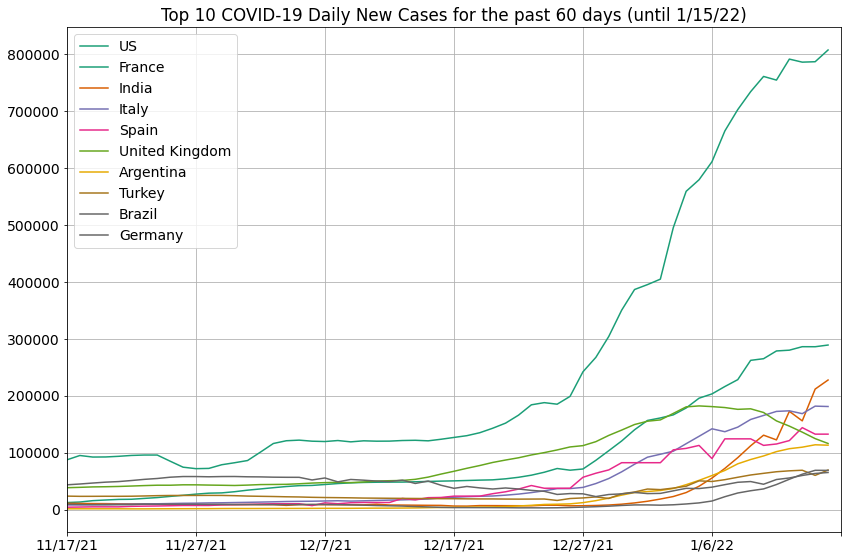

In [3]:
plt.rcParams['font.size'] = font_size
df[-window:].plot(figsize=(12, 8), fontsize=font_size, grid=True, colormap='Dark2', 
                  title=f'Top {countries} COVID-19 Daily New Cases for the past {window} days (until {last_date})')
plt.xlim([0, window])
plt.legend(fontsize=font_size)
plt.tight_layout()
plt.show()